In [1]:
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
freq = rf.Frequency(1, 10, 101, 'ghz')
line = rf.media.DefinedGammaZ0(frequency=freq, z0=50)
LC_manual = line.inductor(24e-9) ** line.capacitor(70e-12)

In [9]:
port1 = rf.Circuit.Port(frequency=freq, name='port1',z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2',z0=50)
cap = rf.Circuit.SeriesImpedance(frequency=freq, name='cap1', z0=50, Z=1/(1j*freq.w*70e-12))
ind = rf.Circuit.SeriesImpedance(frequency=freq, name='ind1', z0=50, Z=1j*freq.w*24e-9)

connections = [ [(port1,0),(cap,0)],[(cap,1),(ind,0)],[ (ind,1),(port2,0)] ]
circuit = rf.Circuit(connections)
LC_from_circuit = circuit.network

In [11]:
print(np.allclose(LC_manual.s, LC_from_circuit.s))

True


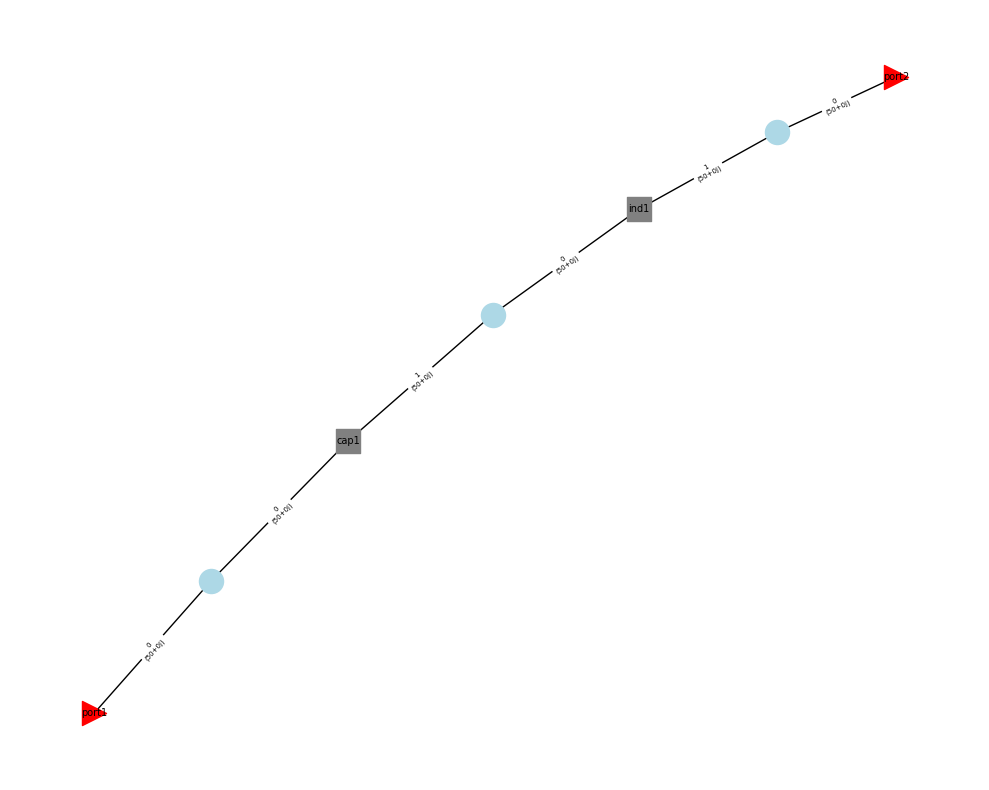

In [12]:
circuit.plot_graph(network_labels=True, edge_labels=True, port_labels=True)

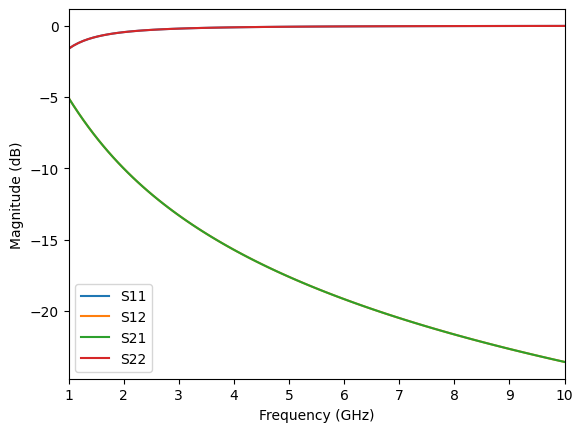

In [13]:
LC_manual.plot_s_db()

# Band Pass Filter 예

In [ ]:
freq = rf.Frequency(0.1,1,1001,'ghz')
line = rf.media.DefinedGammaZ0(frequency=freq, z0=50)
passband_manual = line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9) ** \
                  line.capacitor(2.419e-12) ** line.inductor(43.636e-9) ** \
                  line.shunt_capacitor(25.406e-12) ** line.shunt_inductor(4.154e-9)
passband_manual.plot_s_db()


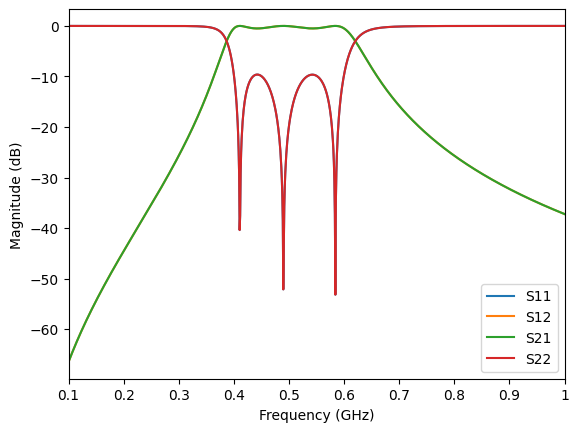

In [ ]:
rf.write_touchstone('bandpassfilter.s2p', passband_manual)